In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')


from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns = data.feature_names)

In [4]:
df['Price'] = data.target

In [5]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [6]:
df = df.sample(frac = 0.20)

In [7]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [8]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
16974,4.9013,45.0,5.635220,0.946541,829.0,2.606918,37.56,-122.31
8706,5.3990,34.0,5.352584,1.000000,965.0,2.933131,33.83,-118.34
7011,2.4607,32.0,4.287516,1.041614,3017.0,3.804540,33.97,-118.07
13096,4.1500,19.0,6.180451,1.007519,457.0,3.436090,38.51,-121.30
5403,3.6467,36.0,4.409091,1.102273,867.0,2.463068,34.03,-118.43
...,...,...,...,...,...,...,...,...
18408,5.0772,17.0,5.243968,0.987936,2693.0,3.609920,37.27,-121.80
8067,5.0052,44.0,5.463504,1.010949,542.0,1.978102,33.83,-118.18
14732,5.4544,26.0,6.550820,0.986885,874.0,2.865574,32.81,-117.02
3949,5.4527,33.0,6.426108,1.061576,1208.0,2.975369,34.21,-118.61


In [9]:
y

16974    3.301
8706     3.585
7011     1.556
13096    1.575
5403     3.467
         ...  
18408    2.215
8067     3.218
14732    1.809
3949     2.271
4411     2.417
Name: Price, Length: 4128, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [13]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [15]:
y_pred = model.predict(X_test)

In [16]:
y_pred

array([4.657, 4.105, 0.767, ..., 1.482, 1.525, 2.657])

In [17]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.4718358296781573

In [18]:
parameter = {
    'criterion': ['squared_error', 'poissor'],
    'max_depth':[1, 2, 3, 4, 6, 8],
    'splitter':['best', 'random'],
    'max_features': ['sqrt', 'log2']
}
reg = DecisionTreeRegressor()

In [19]:
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(reg, param_grid = parameter, cv = 5, scoring = "neg_mean_squared_error")

In [20]:
model

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'poissor'],
                         'max_depth': [1, 2, 3, 4, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [21]:
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'poissor'],
                         'max_depth': [1, 2, 3, 4, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [22]:
model.best_params_

{'criterion': 'squared_error',
 'max_depth': 8,
 'max_features': 'log2',
 'splitter': 'best'}

In [23]:
final_model = DecisionTreeRegressor(criterion = "squared_error", max_depth = 8)

In [24]:
final_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

[Text(0.5584161931818182, 0.9444444444444444, 'x[0] <= 4.985\nsquared_error = 1.311\nsamples = 2889\nvalue = 2.06'),
 Text(0.30131392045454547, 0.8333333333333334, 'x[0] <= 3.326\nsquared_error = 0.795\nsamples = 2240\nvalue = 1.708'),
 Text(0.14790482954545456, 0.7222222222222222, 'x[5] <= 2.197\nsquared_error = 0.541\nsamples = 1315\nvalue = 1.411'),
 Text(0.06285511363636363, 0.6111111111111112, 'x[0] <= 2.304\nsquared_error = 0.886\nsamples = 241\nvalue = 1.937'),
 Text(0.022727272727272728, 0.5, 'x[0] <= 0.902\nsquared_error = 0.525\nsamples = 104\nvalue = 1.529'),
 Text(0.005681818181818182, 0.3888888888888889, 'x[3] <= 1.066\nsquared_error = 1.308\nsamples = 4\nvalue = 3.029'),
 Text(0.002840909090909091, 0.2777777777777778, 'squared_error = 0.0\nsamples = 1\nvalue = 1.365'),
 Text(0.008522727272727272, 0.2777777777777778, 'x[3] <= 1.082\nsquared_error = 0.514\nsamples = 3\nvalue = 3.583'),
 Text(0.005681818181818182, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue

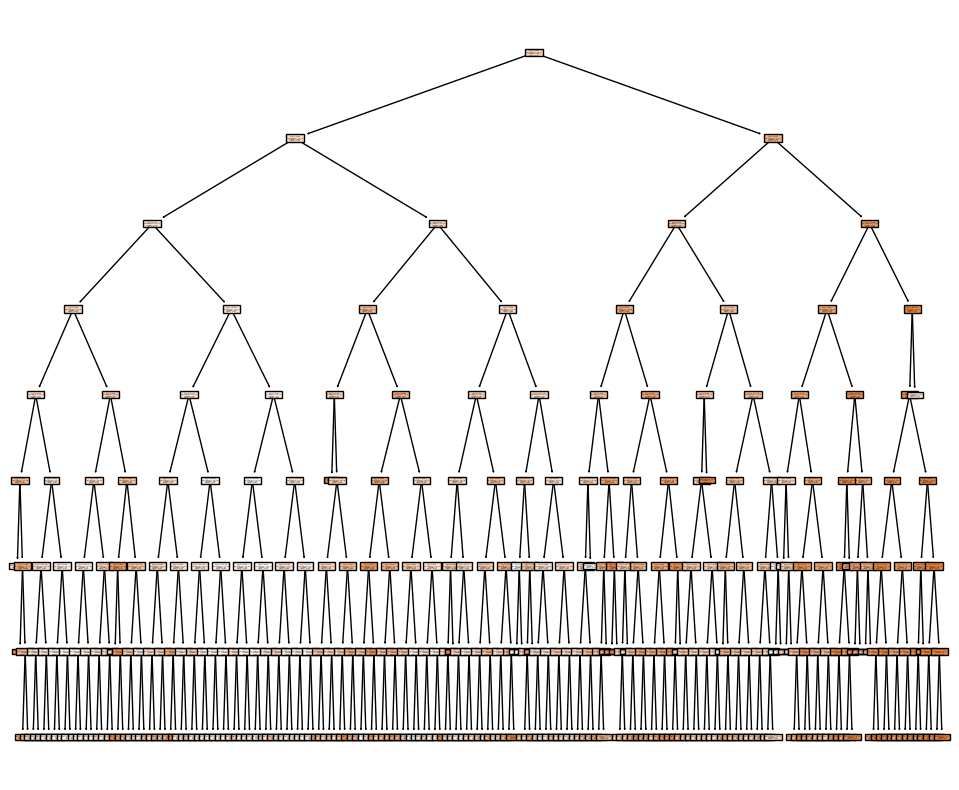

In [25]:
from sklearn import tree
plt.figure(figsize = (12, 10))
tree.plot_tree(final_model, filled = True)

In [26]:
y_pred = model.predict(X_test)

In [27]:
r2_score(y_test, y_pred)

0.5743876118129058